<a href="https://colab.research.google.com/github/HusnaMundambra/CognoRise-InfoTech/blob/main/Task_1_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -U kaleido

# Breast Cancer Prediction

**Benign:**

Benign tumors are abnormal but harmless growths of cells that can form anywhere in the body and do not spread or invade other tissues.

**Malignant:**

Malignant tumors which are cancerous and can grow rapidly, invade nearby organs, and spread to other parts of the body through the bloodstream or lymphalic system.

In [6]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Load the dataset
df=pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.shape

(569, 33)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df=df.dropna(axis=1)

In [12]:
df.shape

(569, 32)

In [13]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
#converting object into numerical
from sklearn.preprocessing import LabelEncoder
labelEncoder_y=LabelEncoder()
df.iloc[:,1]=labelEncoder_y.fit_transform(df.iloc[:,1].values)

<ipython-input-14-9becb280c86c>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=labelEncoder_y.fit_transform(df.iloc[:,1].values)


In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
corr_matrix=df.corr()

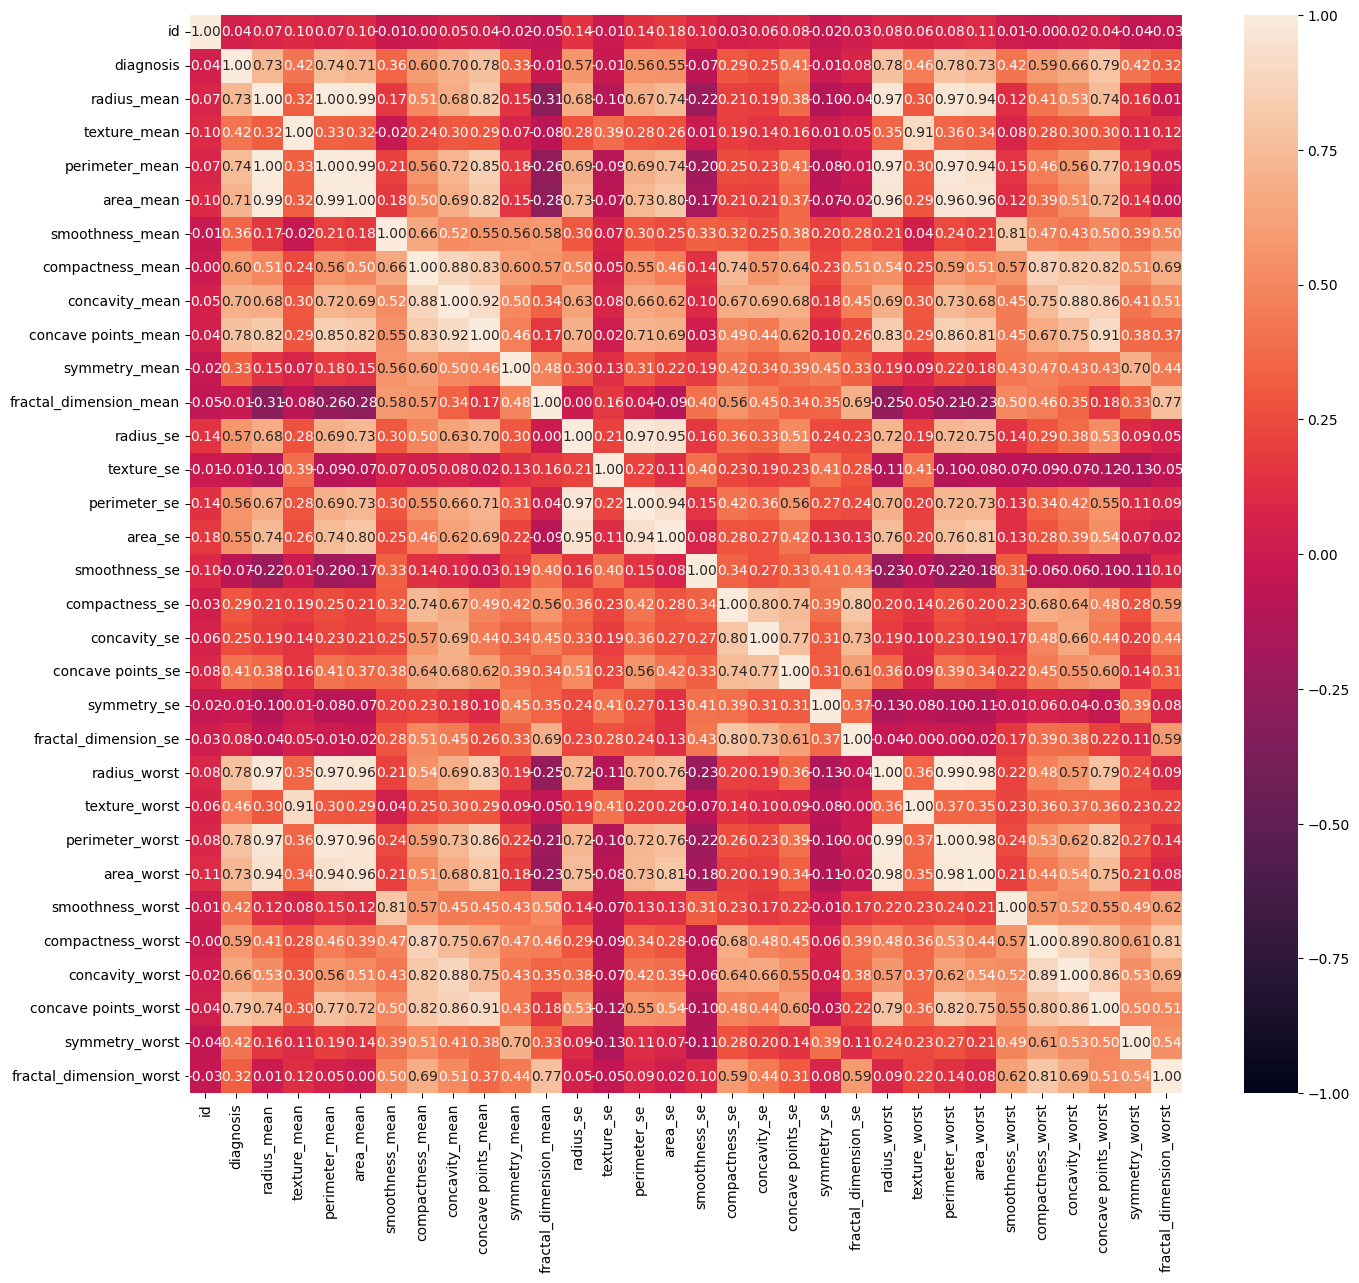

In [17]:
plt.figure(figsize=(16,14))
heatmap=sns.heatmap(corr_matrix,vmin=-1,vmax=1,annot=True,fmt='.2f')

In [18]:
#Independent variable and Dependent variable
x=df.iloc[:,2:31].values
y=df.iloc[:,1].values

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 0)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.86      0.94      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



RANDOMFOREST CLASSIFIER

In [23]:
from sklearn.ensemble import RandomForestClassifier
rc_model=RandomForestClassifier()
rc_model.fit(x_train,y_train)
y_pred_rc=rc_model.predict(x_test)
print(classification_report(y_test,y_pred_rc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



KNN CLASSIFIER

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kc_model=KNeighborsClassifier()
kc_model.fit(x_train,y_train)
y_pred_kc=kc_model.predict(x_test)
print(classification_report(y_test,y_pred_kc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_pred.reshape(len(y_pred),1))
regressor.intercept_
regressor.coef_



[[ 0.76699863]
 [ 0.19131625]
 [ 0.00889861]
 [ 0.19951768]
 [ 0.02252203]
 [ 0.09987055]
 [-0.03507907]
 [ 0.04315471]
 [-0.09675764]
 [-0.08259805]
 [ 0.28221701]
 [ 0.2331773 ]
 [-0.29300303]
 [ 0.2887999 ]
 [ 0.35713403]
 [ 0.79617713]
 [-0.01863244]
 [ 0.87234941]
 [ 0.84420337]
 [ 1.13981502]
 [ 0.93825288]
 [ 0.64245311]
 [ 0.1428698 ]
 [ 0.02260277]
 [ 0.72486802]
 [ 0.04871609]
 [-0.12991791]
 [ 0.65515259]
 [ 0.06417793]
 [ 0.98619988]
 [-0.03885987]
 [ 0.74985422]
 [ 0.36130873]
 [ 0.62975049]
 [-0.30292123]
 [ 0.90837933]
 [ 0.23112717]
 [ 0.65800561]
 [ 0.23567082]
 [ 0.95704355]
 [ 0.57651466]
 [-0.16541653]
 [ 0.4667083 ]
 [-0.17094692]
 [ 0.3579674 ]
 [ 1.2720977 ]
 [-0.35934718]
 [ 0.18230407]
 [ 0.01001187]
 [ 1.03949101]
 [ 0.44358971]
 [ 0.37323259]
 [ 0.83272614]
 [ 0.08096054]
 [ 0.02987317]
 [ 0.03091946]
 [-0.04573038]
 [ 0.21318521]
 [ 0.13245272]
 [ 0.97933354]
 [ 0.86760534]
 [ 0.82729644]
 [-0.16806381]
 [ 0.12034339]
 [ 0.93864891]
 [ 0.28334889]
 [ 1.61290

array([-1.01602692e-01,  1.12786491e-02,  6.02562355e-03,  2.19860865e-04,
        4.56001257e-01, -4.73719474e+00,  1.74463196e+00,  1.43097120e+00,
        8.54955055e-01,  5.64642964e+00,  6.44411864e-01,  1.73520014e-02,
       -6.15268541e-02, -7.26930411e-05,  9.46759383e+00,  4.64784220e-01,
       -3.51481700e+00,  5.29675574e+00,  2.55059449e+00, -7.33809283e+00,
        1.81578947e-01,  1.70911751e-03,  2.20895888e-03, -1.13207843e-03,
        9.88467203e-01,  5.49413727e-01,  4.01102559e-01,  9.89867031e-01,
        8.71736134e-02])

In [26]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("r2 score:",r2)

r2 score: 0.7365844981525745


THEREFORE THE BEST MODEL IS RANDOM FOREST CLASSIFIER